# Segundo Trabalho de PME3322
Turma 2 - Quinta-feira
## Integrantes:
- Arthur Pedroso Porto Belli 11804608
- Lucas Kairuz Martins 11805377
- Maria Eduarda Dall Orto de Araujo 1182030

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

Variáveis pré-calculadas

In [55]:
D = 0.05
CD = 0.47
RHO_RHOS = 2.03
V0 = 3.4
G = 9.81

Determinação de $\alpha$ e $\beta$

In [60]:
ALPHA = -G*(RHO_RHOS - 1)
BETA = -(3/4)*RHO_RHOS*(CD/D)
print(ALPHA)
print(BETA)

-10.104299999999999
-14.311499999999997


Cálculo de $h_{max}$ e $T$

In [66]:
hmax = (1/(2*BETA))*np.log((ALPHA/BETA)/((V0**2) + (ALPHA/BETA)))
T = -(1/(BETA*math.sqrt(ALPHA/BETA)))*np.arctan(V0/(math.sqrt(ALPHA/BETA)))
print(hmax)
print(T)

0.09974271430828005
0.1104769154529528


## Solução da equação $(ii)$ pelo método de Runge-Kutta de 4ª ordem
$\frac{dV}{dt} = \alpha + \beta \cdot |V|V$

In [62]:
def dvdt(tempo, V):
    return (ALPHA  +  BETA*abs(V)*V)
 
v_num = []
tempo = []
v_num.append(V0) #velocidade inicial
tempo.append(0) #tempo inicial
n = 10**4 #optou-se por 10^4 passos para obter-se maior precisão
h = 2*T/n #tamanho do passo

for i in range(n):
    #Aplicar Runge-Kutta para achar o próximo valor de V
    k1 = h * dvdt(tempo[i], v_num[i])
    k2 = h * dvdt(tempo[i] + 0.5 * h, v_num[i] + 0.5 * k1)
    k3 = h * dvdt(tempo[i] + 0.5 * h, v_num[i] + 0.5 * k2)
    k4 = h * dvdt(tempo[i] + h, v_num[i] + k3)

    
    v_num.append(v_num[i] + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)) #atualização do valor de v para a próxima iteração
    tempo.append(tempo[i] + h) #preenchimento do vetor de tempo

### Solução analítica de $(ii)$


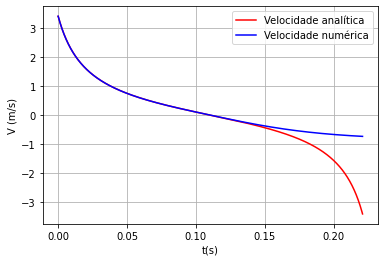

In [67]:
#solução analítica
def v_anal(t):
    return np.sqrt(ALPHA/BETA)*np.tan(BETA*t*np.sqrt(ALPHA/BETA) + np.arctan(V0/np.sqrt(ALPHA/BETA)))

v_anal_sol = []
v_anal_sol.append(V0)

for i in range(n):
    v_anal_sol.append(v_anal(tempo[i])) #preenchimento do vetor de solução analítica

plt.grid(visible=True)
plt.plot(tempo, v_anal_sol, 'r')
plt.plot(tempo, v_num, 'b')
plt.xlabel("t(s)")
plt.ylabel("V (m/s)")
plt.legend(["Velocidade analítica", "Velocidade numérica"])

## Solução da equação $(i)$
$\frac{dz}{dt} = V$

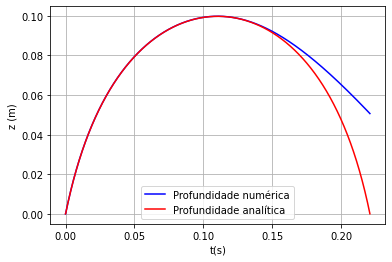

In [65]:
#solução analítica
def z_anal(v):
    return (1/(2*BETA))*np.log(((v)**2 + ALPHA/BETA)/(V0**2 + ALPHA/BETA))

z_num = [0 for i in range(n)]
z_num.append(0)

z_anal_sol = []
z_anal_sol.append(0)

for i in range(n):
    z_num[i+1] = v_num[i]*h + z_num[i] #iteração do método de Euler para os próximos valores de z com base nas velocidades encontradas na equação (1.2)
    z_anal_sol.append(z_anal(v_anal(tempo[i]))) #cálculo dos valores analíticos de z para os mesmos instantes de tempo calculados numericamente

#plottando as curvas
plt.xlabel("t(s)")
plt.ylabel("z (m)")
plt.grid(visible=True)
plt.plot(tempo, z_num, 'b')
plt.plot(tempo, z_anal_sol, 'r')
plt.legend(["Profundidade numérica", "Profundidade analítica"])




In [41]:
z_max_num = max(z_num) #profundidade máxima numérica numérico
t_max = z_num.index(z_max_num) #índice da profundidade máximo

#tempo de profundidade máxima numérico
print(t_max*2*T/n)




0.1104769154529528
